 If needed, there are comments in the first part of the file `DataAnalysis_DMPC` that explains the logic used.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
Mix_density = np.array([1.000017,0.999951,0.999828,0.999649,0.999418,0.999137,0.998809,0.998438,0.998023,0.997567,0.997070,0.996537,0.995967,0.995361,0.994722,0.994049,0.993344,0.992609,0.991843,0.991048,0.990224,0.989372,0.988494])
Temperature = np.array([4.996,7.003,9.003,11.004,13.004,15.004,17.004,19.004,21.003,23.003,25.004,27.004,29.004,31.004,33.004,35.004,37.004,39.004,41.003,43.004,45.004,47.005,49.004])

a = np.array([9.9983952*10**2,1.6952577*10,-7.9905127*10**(-3),-4.6241757*10**(-5),1.584601*10**(-7),-2.8103006*10**(-10)])/1000
b = 1.6887236*10**(-2)

water_density = 0
for i in range(0, 5):
    water_density += a[i]*Temperature**i/(1+b*Temperature)
    
wL = 0.003/(1.003)
Spec_vol_sample = 1/Mix_density

Spec_vol_water = 1/water_density

Spec_vol = (Spec_vol_sample - (1 - wL) * Spec_vol_water)/wL

In [4]:
# Let us compute dV/dT using forward finite differences to compute alpha

alpha = np.empty(len(Temperature))

for i in range(0,len(alpha)-1):
    alpha[i] = ((Spec_vol[i+1]-Spec_vol[i])/(Temperature[i+1]-Temperature[i]))/Spec_vol[i]
alpha = alpha[:-1]

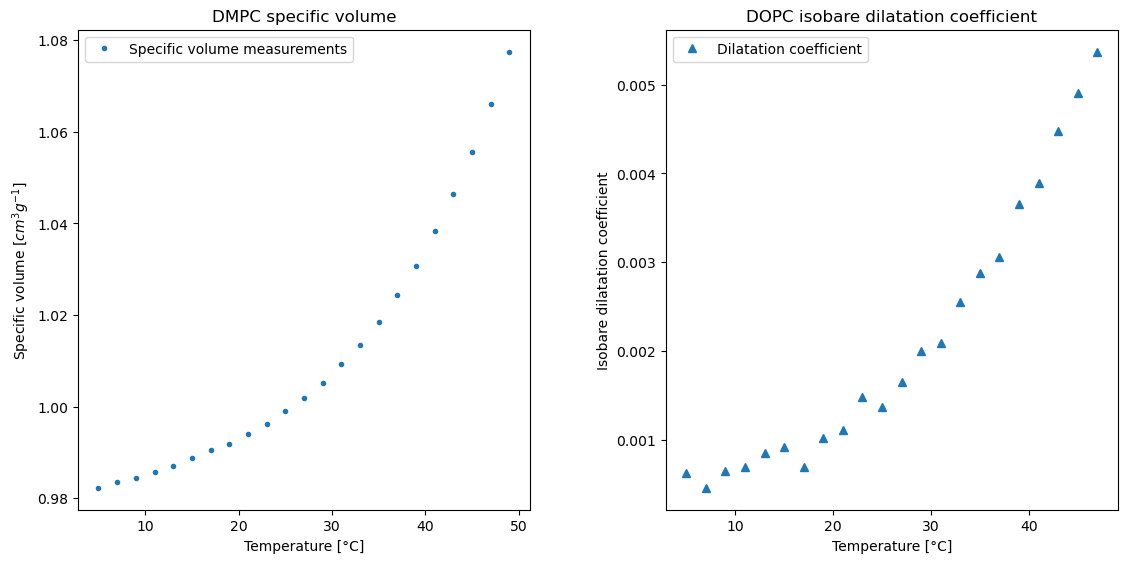

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(13, 6))

ax[0].plot(Temperature, Spec_vol,'.',label='Specific volume measurements')
ax[1].plot(Temperature[:-1],alpha,'^',label='Dilatation coefficient')
for k in range(0,2):
    ax[k].legend()



ax[0].set_xlabel('Temperature [°C]')
ax[1].set_xlabel('Temperature [°C]')
ax[0].set_ylabel('Specific volume [$cm^3g^{-1}$]')
ax[1].set_ylabel('Isobare dilatation coefficient')
ax[0].set_title('DMPC specific volume')
ax[1].set_title('DOPC isobare dilatation coefficient')
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.5)